# ALT HYPOTHESIS: Per capita income has not increaed in proportion to GDP per capita

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
#plot.style.use('classic')

## Importing first data set - GDP for OECD Countries

In [2]:
# Revised GDP US$ per capita
gdp_df = pd.read_excel("datasets/GDP_CurrentUS.xls", sheet_name="Data")
gdp_df = gdp_df.transpose()
gdp_df.drop(columns = [0, 1], inplace=True)
gdp_df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Data Source"], inplace = True)
gdp_df.index = gdp_df[2]
# Drop all years before 1990
for i in range(1960, 1990):
    gdp_df.drop([i], inplace = True)
    
gdp_df.columns = gdp_df.iloc[0]
# Drop extra row
gdp_df.drop(labels = ["Country Code"], inplace = True)
# Rename column
gdp_df.rename(columns = {"Country Code" : "Year"}, inplace = True)
# Delete columns of countries not in OECD
# -> Need List of OECD countries, get from wage datas
gdp_df.head()

Country Code,Year,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
2,,,,,,,,,,,,,,,,,,,,,
1990.0,1990,12307.3,NaN,947.704,617.23,18878.5,2009.42,27729.5,4333.48,637.855,...,NaN,95.1883,1152.18,4285.3,772.506,NaN,482.248,3139.97,408.77,841.973
1991.0,1991,13496,NaN,865.693,336.587,19532.5,1929.61,26612.3,5735.36,590.121,...,NaN,138.447,1335.85,4464.72,765.851,NaN,482.061,3285.95,409.728,809.052
1992.0,1992,14046.5,NaN,656.362,200.852,20547.7,2027.83,26420.9,6823.54,369.633,...,NaN,139.2,1347.48,4668.3,799.462,NaN,498.963,3479.07,376.499,619.373
1993.0,1993,14936.8,NaN,441.201,367.279,16516.5,1996.92,25596.7,6969.12,357.203,...,NaN,182.308,1255.08,4669.64,796.575,NaN,393.739,3388.73,378.125,591.72
1994.0,1994,16241,NaN,328.673,586.416,16234.8,1989.46,25847.9,7483.14,400.515,...,NaN,221.129,1423.89,4939.92,1310.65,NaN,291.472,3445.23,412.261,611.866


In [3]:
# Source: OECD Data sets
# Avalible: https://data.oecd.org/earnwage/average-wages.htm
wage_df = pd.read_csv("datasets/AverageWages_OECD_2000_2020.csv", usecols=['LOCATION', 'TIME', 'Value'])
wage_df.Value = wage_df.Value.div(1000)    # put value into thousands
wage_df.columns = ['Location', 'Year', 'Average_Wage']    # Rename columns appropriately
#wage_df.drop(wage_df.loc[wage_df['Year'] < 1980].index, inplace = True)
#wage_df.drop(wage_df.loc[wage_df['MEASURE'] != "USD"].index, inplace=True)
wage_df.head()

,Location,Year,Average_Wage
0,AUS,1990,40.717483
1,AUS,1991,40.523590
2,AUS,1992,41.337046
3,AUS,1993,41.717578
4,AUS,1994,42.000420


In [4]:
# Getting countries list from wages_df
oecd_countries = wage_df['Location'].unique() # Find Unique categories in data
oecd_countries

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
       'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'GBR', 'USA',
       'EST', 'ISR', 'SVN', 'OECD', 'ISL', 'NZL', 'CHL', 'LVA', 'LTU'],
      dtype=object)

In [5]:
# Drop countries from gdp_df not in oecd data
# Create list of countries included in gdp_data for comparison
gdp_countries = list(gdp_df)
# compare gdp and oecd countries, drop non-oecd countries
for gdp_country in gdp_countries:
    found = False
    for oecd_country in oecd_countries:
        if oecd_country == gdp_country:
            # Divide by 1000 to get value in thousands at the same time
            gdp_df[gdp_country] = gdp_df[gdp_country].div(1000)    # put value into thousands
            found = True
            break
        # Exception for Year column
        if gdp_country == 'Year':
            found = True
            break
    if not found:
        gdp_df.drop(columns = [gdp_country], inplace=True)

# Compare oecd countries and GDP countries to find any missing countries
gdp_countries = list(gdp_df)
for oecd_country in oecd_countries:
    found = False
    for gdp_country in gdp_countries:
        if oecd_country == gdp_country:
            found = True
            break
        # Exception for Year column
        if gdp_country == 'Year':
            found = True
            break
    if not found:
        print('Missing country: ' + oecd_country)
        
gdp_df.head()

Country Code,Year,AUS,AUT,BEL,CAN,CHE,CHL,CZE,DEU,DNK,...,MEX,NLD,NOR,NZL,POL,PRT,SVK,SVN,SWE,USA
2,,,,,,,,,,,,,,,,,,,,,
1990.0,1990,18.2115,21.681,20.6004,21.4484,38.4284,2.49453,3.9415,22.304,26.8914,...,3.11227,21.2909,28.2429,13.663,1.73121,7.88462,2.40554,9.10747,30.5937,23.8886
1991.0,1991,18.8218,22.4109,21.0417,21.7683,38.3992,2.80356,2.89661,23.3578,27.0114,...,3.66195,21.7322,28.5969,12.2301,2.23554,8.95899,2.6912,6.63374,31.8228,24.3423
1992.0,1992,18.5701,24.8802,23.3726,20.8798,39.5345,3.35021,3.37287,26.4382,29.5697,...,4.17062,23.904,30.524,11.7931,2.45902,10.8106,2.92092,6.56202,32.801,25.419
1993.0,1993,17.6345,24.0815,22.2839,20.1212,38.1007,3.53517,3.95618,25.5226,27.598,...,5.65003,23.1224,27.9637,13.0943,2.4972,9.53466,3.1023,6.65693,24.4253,26.3873
1994.0,1994,18.0461,25.6467,24.2086,19.9354,41.8438,4.02422,4.63055,27.0766,29.9956,...,5.85442,24.6463,29.3158,15.2803,2.87483,9.97732,3.77136,7.56474,26.0836,27.6949


Only the OECD 'country' is missing, this is to be expected comparing oecd data and world data that does not include oecd

In [6]:
# Creating a dictionary containing Country and their associated data by year
# This makes plotting multiple graphs with a function easier
def get_country_data(data_frame, country: str):
    return data_frame[data_frame['Location'] == country]
# An example
USA_data = get_country_data(wage_df, 'USA')
USA_data.head()

,Location,Year,Average_Wage
750,USA,1990,46.362057
751,USA,1991,46.676728
752,USA,1992,47.758461
753,USA,1993,47.484217
754,USA,1994,47.301622


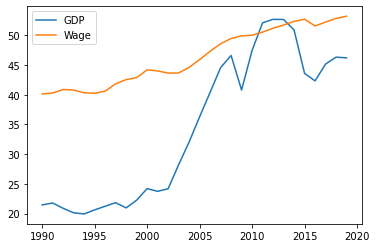

In [13]:
# Trial Plot of USA
usa_wage_data = get_country_data(wage_df, 'CAN')
plot.plot(gdp_df['Year'], gdp_df['CAN'], usa_wage_data['Year'], usa_wage_data['Average_Wage'])
plot.legend(['GDP', 'Wage'])

## Combining Data Frames

In [1]:
def plot_country_wage_gdp(country: str):
    gdp_data = gdp_df[country]
    wage_data = get_country_data(wage_df, country)
    plot.plot(wage_data['Year'], wage_data['Average_Wage'],
              gdp_data['Year'], gdp_data['GDP'])
    plot.legend(['GDP', 'Wage'])
plot_country_wage_gdp('USA')
get_country_data(gdp_df, "USA")

NameError: name 'gdp_df' is not defined

In [2]:
line, = plot.plot(get_country_data(gdp_df, 'USA')['Year'], get_country_data(gdp_df, 'USA')['GDP'])
return_country_data(gdp_df, 'USA').legend()

NameError: name 'plot' is not defined